In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [27]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Clustering\\EastWestAirlines2.csv')
df.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [28]:
df=df.iloc[:,1:]
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [25]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [29]:
dfN=norm_fun(df)
dfN.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


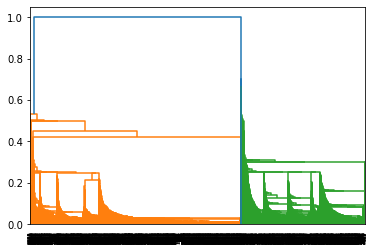

In [30]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='single'))

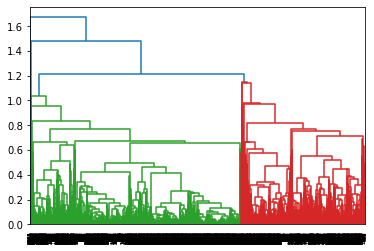

In [31]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='average'))

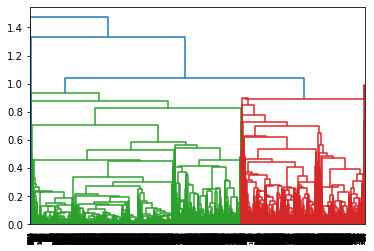

In [32]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='centroid'))

In [12]:
# DBSCAN

In [34]:
array=dfN.values
array

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [48]:
dbscan = DBSCAN(eps=0.3,min_samples=6)
dbscan.fit(array)

DBSCAN(eps=0.3, min_samples=6)

In [49]:
#Noisey Data
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
cl=pd.DataFrame(dbscan.labels_,columns=["clustersDBS"])
cl

,clustersDBS
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [61]:
df1=df
df1['clustersDBS']=cl
df1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersDBS,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0


In [56]:
# Hierarchical Clustering

In [57]:
hc=AgglomerativeClustering(n_clusters =3,affinity='euclidean',linkage='average')

In [58]:
y_hc=hc.fit_predict(dfN)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [62]:
df2=df
df2["Cluster"]=Clusters

In [68]:
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersDBS,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [69]:
# KMeans Clustering


In [70]:
inertia = []
for i in range (1,5):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(dfN)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

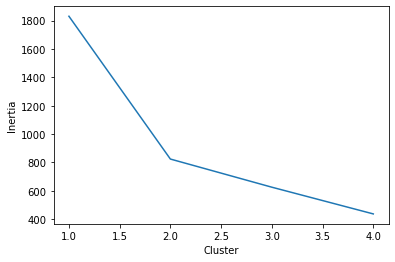

In [71]:
plt.plot(range(1,5),inertia)
plt.xlabel('Cluster')
plt.ylabel('Inertia')

In [72]:
clusterN=KMeans(2,random_state=1)
clusterN.fit(dfN)

KMeans(n_clusters=2, random_state=1)

In [73]:
clusterN.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [74]:
df3=df
df3.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersDBS,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0


In [75]:
df3["Cluster_Kmean"]=clusterN.labels_
df3.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersDBS,Cluster,Cluster_Kmean
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1


In [76]:
df3.groupby('Cluster_Kmean').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersDBS,Cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Kmean,,,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.913572,0.004051
1,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.015488,0.000000


In [77]:
# Inference is that 2 is the Optimal K value for K Means Clustering and there can be 2 significant clusters that can be created on the above data set 
